In [1]:
using Interpolations
using Plots
using PyPlot 
import PyPlot
using LaTeXStrings
using PyCall

In [231]:
using NPZ

In [73]:
imp = pyimport("importlib")

PyObject <module 'importlib' from '/usr/projects/hpcsoft/toss3/common/x86_64/anaconda/5.0.1-python-3.6/lib/python3.6/importlib/__init__.py'>

In [3]:
pxr = pyimport("pixie_read_st")

PyObject <module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [74]:
na = CartesianIndex();

## Data Loading

Pixie3D fundamental relations with geometric components:  
$B^1 = \mathcal{J} B^{r}$, ...  
$B_1 = B_r$, ...

In [75]:
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

"/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

In [258]:
pxr.pixieload(filepath)

In [259]:
imp.reload(pxr)

PyObject <module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [260]:
B1c = pxr.load_array(1,0,0,5);
B2c = pxr.load_array(1,1,0,5);
B3c = pxr.load_array(1,2,0,5);

In [261]:
B_1c = pxr.load_array(2,0,0,5);
B_2c = pxr.load_array(2,1,0,5);
B_3c = pxr.load_array(2,2,0,5);

In [262]:
X = pxr.load_array(6,0,0,0);
Z = pxr.load_array(6,2,0,0);

In [263]:
# definitions of cell grid
num_r_cells = size(B3c)[1];
num_u_cells = size(B3c)[2];
num_phi_cells = size(B3c)[3];
dn_r = (1.0/num_r_cells);
dn_u = ((2.0*pi)/num_u_cells);

# Cell-based grid
rc = LinRange(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num_r_cells);
uc = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_u_cells);
phic = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_phi_cells);
tn = LinRange(0, size(B3c)[4]-1,size(B3c)[4]);

# Node-based grid
rn = LinRange(0.0,1.0,(num_r_cells+1));
un = LinRange(0.0,2.0*pi,(num_u_cells+1));
phin = LinRange(0.0,2.0*pi,(num_phi_cells+1));

In [264]:
B1_int = Interpolations.interpolate(B1c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B2_int = Interpolations.interpolate(B2c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B3_int = Interpolations.interpolate(B3c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_1_int = Interpolations.interpolate(B_1c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_2_int = Interpolations.interpolate(B_2c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_3_int = Interpolations.interpolate(B_3c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));

In [265]:
B1_sint = scale(B1_int,rc,uc,phic,tn);
B2_sint = scale(B2_int,rc,uc,phic,tn);
B3_sint = scale(B3_int,rc,uc,phic,tn);
B_1_sint = scale(B_1_int,rc,uc,phic,tn);
B_2_sint = scale(B_2_int,rc,uc,phic,tn);
B_3_sint = scale(B_3_int,rc,uc,phic,tn);

In [266]:
B1_eint = extrapolate(B1_sint, (Line(),Periodic(),Periodic(),Line()));
B2_eint = extrapolate(B2_sint, (Line(),Periodic(),Periodic(),Line()));
B3_eint = extrapolate(B3_sint, (Line(),Periodic(),Periodic(),Line()));
B_1_eint = extrapolate(B_1_sint, (Line(),Periodic(),Periodic(),Line()));
B_2_eint = extrapolate(B_2_sint, (Line(),Periodic(),Periodic(),Line()));
B_3_eint = extrapolate(B_3_sint, (Line(),Periodic(),Periodic(),Line()));

In [267]:
B1 = B1_eint(rn,un,phin,tn);
B2 = B2_eint(rn,un,phin,tn);
B3 = B3_eint(rn,un,phin,tn);
B_1 = B_1_eint(rn,un,phin,tn);
B_2 = B_2_eint(rn,un,phin,tn);
B_3 = B_3_eint(rn,un,phin,tn);

## Cylindrical Metric Tensor

In [268]:
rs = LinRange(0,1,size(X)[1]);
us = LinRange(0,2*pi,size(X)[2]);

In [391]:
grr = zeros(size(X)[1],size(X)[2]);
gtt = zeros(size(X)[1],size(X)[2]);
grt = zeros(size(X)[1],size(X)[2]);
gpp = zeros(size(X)[1],size(X)[2]);

In [392]:
for i in 1:(size(X)[1])
    for j in 1:(size(X)[2])
        grr[i,j] = 1
    end
end

In [393]:
Ro = 1.65;
for i in 1:(size(X)[1])
    for j in 1:(size(X)[2])
        gpp[i,j] = Ro^2 + 4*Ro*rs[i]*cos(us[j]) + 2*(rs[i])^2*cos(us[j])^2
    end
end

In [394]:
for i in 1:(size(X)[1])
    for j in 1:(size(X)[2])
        gtt[i,j] = (rs[i])^2
    end
end

In [375]:
grr_int = Interpolations.interpolate(grr, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gtt_int = Interpolations.interpolate(gtt, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gpp_int = Interpolations.interpolate(gpp, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
grt_int = Interpolations.interpolate(grt, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));

In [376]:
grr_sint = scale(grr_int,rn,un);
gtt_sint = scale(gtt_int,rn,un);
gpp_sint = scale(gpp_int,rn,un);
grt_sint = scale(grt_int,rn,un);

In [377]:
grr_eint = extrapolate(grr_sint,(Line(),Line()));
gtt_eint = extrapolate(gtt_sint,(Line(),Line()));
gpp_eint = extrapolate(gpp_sint,(Line(),Line()));
grt_eint = extrapolate(grt_sint,(Line(),Line()));

In [378]:
grr = grr_eint(rn,un);
grt = grt_eint(rn,un);
gtt = gtt_eint(rn,un);
gpp = gpp_eint(rn,un);

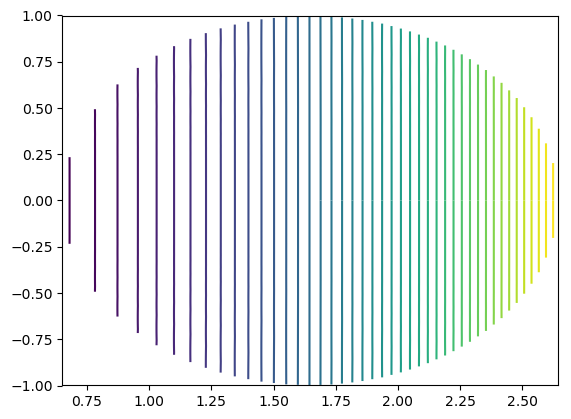

In [384]:
PyPlot.contour(X[:,:,1],Z[:,:,1],gpp,50)
PyPlot.show()

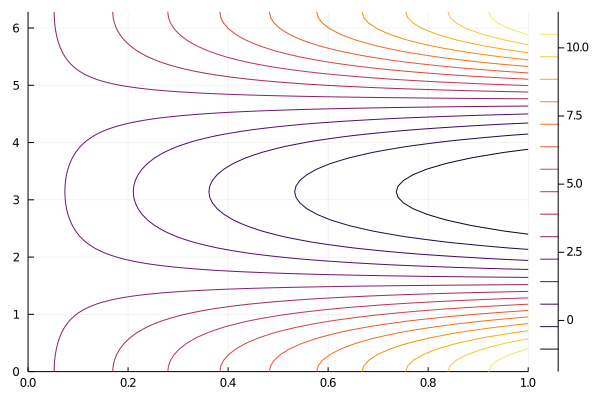

In [399]:
Plots.contour(rs,us,gpp')

## Jacobian

For the toroidal coordinates of Pixie3D Jacobian is given by $\mathcal{J} = Rr$. 

In [218]:
Ro = 1.65;
R = X[:,:,1];
r = sqrt.((R.-Ro).^2 .+ (Z[:,:,1]).^2);
Jac_an = R.*r;

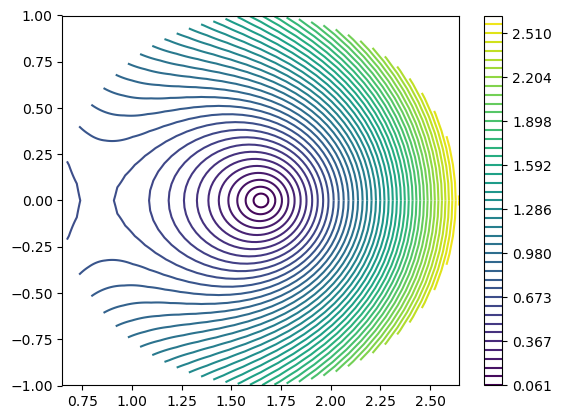

In [219]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Jac_an,levels=LinRange(0.0,3.0,50))
PyPlot.colorbar()
PyPlot.show()

For the computational calculation of the Jacobian we have the relation $\mathcal{J} = \frac{B^1}{B_1}$ because $g_{rr} = g^{rr} = 1$.

In [220]:
Jac_cmp = B1c[:,:,1,1]./B_1c[:,:,1,1];

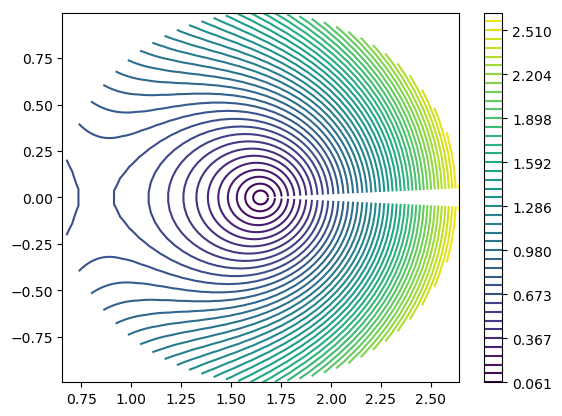

In [221]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Jac_cmp,levels=LinRange(0.0,3.0,50))
PyPlot.colorbar()
PyPlot.show()

In [222]:
Jac_cmp_int = Interpolations.interpolate(Jac_cmp,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell())))));
Jac_cmp_sint = scale(Jac_cmp_int,rc,uc);
Jac_cmp_eint = extrapolate(Jac_cmp_sint, (Line(),Periodic()));
Jac_cmp_n = Jac_cmp_eint(rn,un);

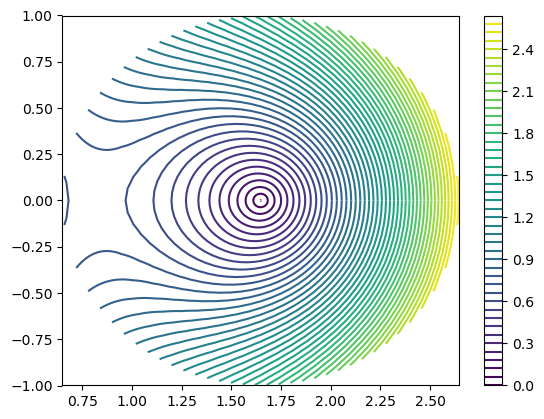

In [223]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Jac_cmp_n[:,:],50)
PyPlot.colorbar()
PyPlot.show()

Note: Analytic and computational Jacobians are the same $\textbf{only}$ when the computational Jacobian is calculated on the cell-based data and then interpolated on the nodes. When the computational Jacobian is directly calculated from the node-interpolated B-components, numerical errors arise.

## $B_p^2$ test

Geometric: $B_p^2 = B^r B_r + B^{\theta}B_{\theta} = B^r g_{rr} B^r + B^{\theta}g_{\theta\theta}B^{\theta}$.  
Pixie3D: $B_p^2 = B^1 B_1 / \mathcal{J} + B^2 B_2 / \mathcal{J} = B^1 g_{rr} B^1/\mathcal{J}^2  + B^2 g_{\theta\theta} B^2/\mathcal{J}^2$

Calculation without the metric tensor:

In [224]:
Bp_j = ((B1.*B_1)./Jac_an[:,:,na,na]) .+ ((B2.*B_2)./Jac_an[:,:,na,na]);

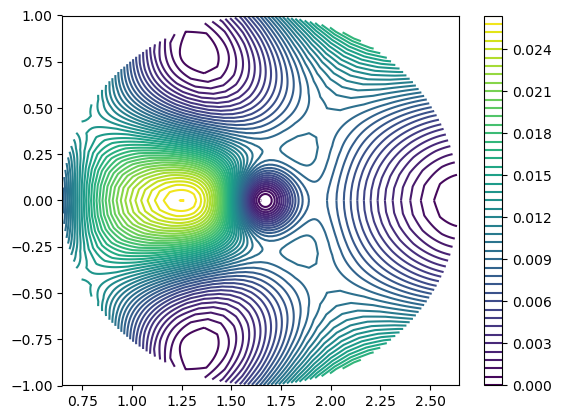

In [225]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Bp_j[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

Calculation with the metric tensor:

In [226]:
J2 = Jac_an.^2;

In [227]:
Bp_mt = ((B1.*B1)./(J2[:,:,na,na])).*grr[:,:,na,na] .+ ((B2.*B2)./(J2[:,:,na,na])).*gtt[:,:,na,na];

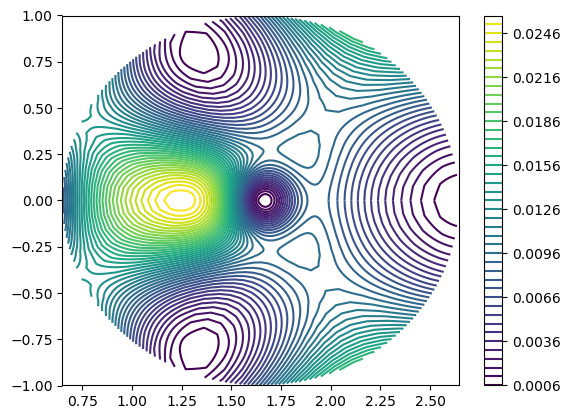

In [228]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Bp_mt[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

Metric tensor components are being calculated correctly.

## Analytical Jacobian from inverting metric tensor

In [251]:
Jac_an2 = npzread("/net/scratch3/giannis_kx/FTLE/11/Jac_Cyl.npy");

In [252]:
ran = LinRange(0.01,1,100);
uan = LinRange(0,2*pi,100);

In [253]:
Jac_an2_int = Interpolations.interpolate(Jac_an2, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));

In [254]:
Jac_an2_sint = scale(Jac_an2_int,ran,uan);

In [255]:
Jac_an2_eint = extrapolate(Jac_an2_sint,(Line(),Line()));

In [256]:
Jac_an2 = Jac_an2_eint(rn,un);

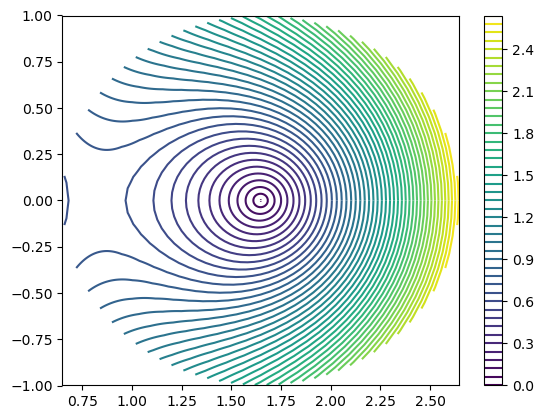

In [257]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],Jac_an2,50)
PyPlot.colorbar()
PyPlot.show()

## $B^2$ test

In [344]:
Bsq = ((B1.*B_1) .+ (B2.*B_2) .+ (B3.*B_3))./Jac_an2[:,:,na,na];

In [354]:
J2_an = Jac_an.^2;

In [404]:
Bsq_mt = ((B1.*B1)./J2_an[:,:,na,na]).*grr[:,:,na,na] .+ ((B2.*B2)./J2_an[:,:,na,na]).*gtt[:,:,na,na] .+ ((B3.*B3)./J2_an[:,:,na,na]).*gpp[:,:,na,na];

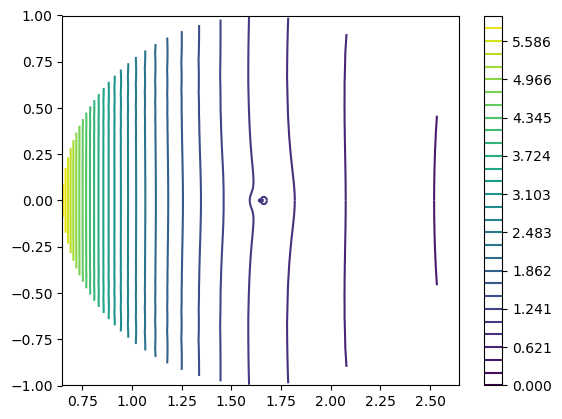

In [340]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Bsq[:,:,1,1],levels=LinRange(0.0,6.0,30))
PyPlot.colorbar()
PyPlot.show()

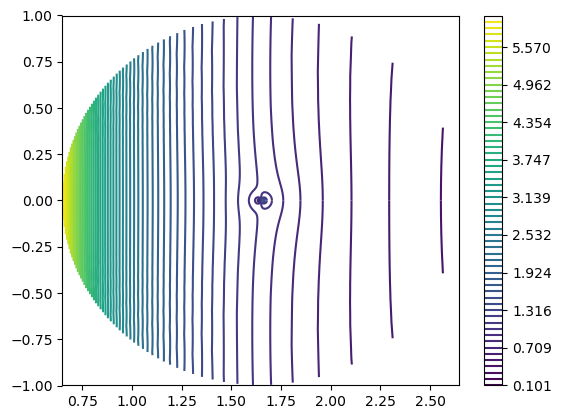

In [405]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Bsq_mt[:,:,1,1],levels=LinRange(0.0,8.0,80))
PyPlot.colorbar()
PyPlot.show()

## Analytical $g_{\phi,\phi}$

In [401]:
gpp = npzread("/net/scratch3/giannis_kx/FTLE/11/gppcyl.npy");

In [403]:
gpp_int = Interpolations.interpolate(gpp, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gpp_sint = scale(gpp_int,ran,uan);
gpp_eint = extrapolate(gpp_sint,(Line(),Line()));
gpp = gpp_eint(rn,un);

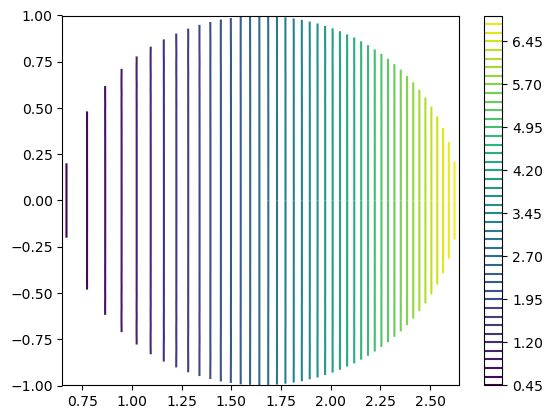

In [406]:
PyPlot.contour(X[:,:,1],Z[:,:,1],gpp[:,:],50)
PyPlot.colorbar()
PyPlot.show()

## Cartesian Components

In [310]:
Bx = pxr.load_array(0,0,0,5);
By = pxr.load_array(0,1,0,5);
Bz = pxr.load_array(0,2,0,5);

In [311]:
BsqCar = Bx.*Bx .+ By.*By .+ Bz.*Bz;

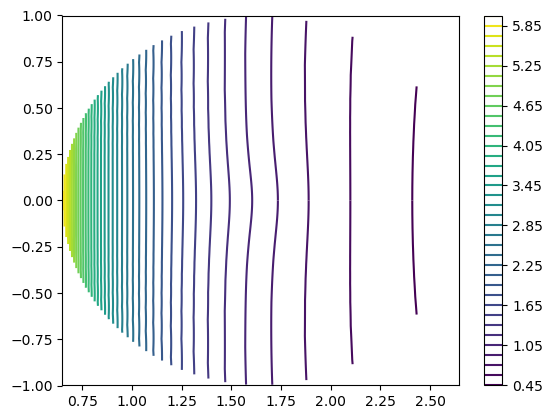

In [312]:
PyPlot.contour(X[:,:,1],Z[:,:,1],BsqCar[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

In [345]:
dBsq = BsqCar - Bsq;
dBsqmt = BsqCar - Bsq_mt;

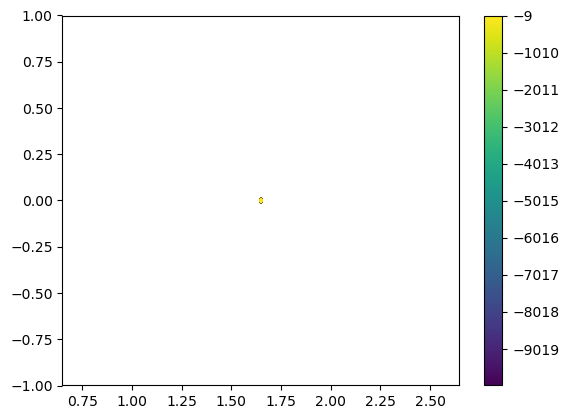

In [332]:
PyPlot.contour(X[:,:,1],Z[:,:,1],dBsqmt[:,:,1,1],levels=LinRange(-10000,1,1000))
#PyPlot.xlim(1.647,1.649)
#PyPlot.ylim(-0.01,0.01)
PyPlot.colorbar()
PyPlot.show()

In [333]:
dBsqmt[10,5,5,1]

0.607687943379204

In [346]:
BsqCar[30,5,5,1]

0.7766576397586763

In [347]:
Bsq[30,5,5,1]

0.7783189436654305

In [348]:
Bsq_mt[10,5,5,1]

0.31540241555924386